In [36]:
import pandas as pd

df_union_sep = pd.read_csv('/content/df_union sep.csv')
display(df_union_sep.shape)

(1779908, 17)

Creamos una copia sin id y sin datos faltantes

In [4]:
df_union_copy = df_union_sep.drop(columns=['hash_sha256_num', 'id_fecha'])
display(df_union_copy.head())

,Género,Grupo etario,Código de la entidad,Nombre de la entidad,Régimen,Tipo de afiliado,Estado del afiliado,Condición del beneficiario,Zona de Afiliación,Departamento,Municipio,Nivel del Sisbén,Grupo poblacional del afiliado,Cantidad de registros,Fecha de actualización
0,Femenino,1 a 5,EPS037,NUEVA EPS S.A.,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,ANTIOQUIA,BETULIA,N,VÍCTIMAS DEL CONFLICTO ARMADO INTERNO,2,2025-09-06 22:28:56
1,Masculino,15 a 19,EPS041,NUEVA EPS S.A. -CM,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,HUILA,PITALITO,1,POBLACIÓN CON SISBEN,2,2025-09-06 22:28:56
2,Femenino,15 a 19,EPS041,NUEVA EPS S.A. -CM,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,BOYACA,SOGAMOSO,0,NaN,13,2025-09-06 22:28:56
3,Femenino,50 a 55,EPS037,NUEVA EPS S.A.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CORDOBA,LA APARTADA,0,NaN,3,2025-09-06 22:28:56
4,Femenino,60 a 65,EPS037,NUEVA EPS S.A.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CUNDINAMARCA,ARBELAEZ,1,POBLACIÓN CON SISBEN,1,2025-09-06 22:28:56


In [5]:
df_union_copy = df_union_copy.drop(columns=['Grupo poblacional del afiliado', 'Cantidad de registros', 'Fecha de actualización'], errors='ignore')
df_union_copy.dropna(inplace=True)
print(df_union_copy.isnull().sum())

Género                        0
Grupo etario                  0
Código de la entidad          0
Nombre de la entidad          0
Régimen                       0
Tipo de afiliado              0
Estado del afiliado           0
Condición del beneficiario    0
Zona de Afiliación            0
Departamento                  0
Municipio                     0
Nivel del Sisbén              0
dtype: int64


In [6]:
print(df_union_copy.dtypes)

Género                        object
Grupo etario                  object
Código de la entidad          object
Nombre de la entidad          object
Régimen                       object
Tipo de afiliado              object
Estado del afiliado           object
Condición del beneficiario    object
Zona de Afiliación            object
Departamento                  object
Municipio                     object
Nivel del Sisbén              object
dtype: object


In [34]:
display(df_union_copy.head())
display(df_union_copy.shape)

,Género,Grupo etario,Código de la entidad,Nombre de la entidad,Régimen,Tipo de afiliado,Estado del afiliado,Condición del beneficiario,Zona de Afiliación,Departamento,Municipio,Nivel del Sisbén
0,Femenino,1 a 5,EPS037,NUEVA EPS S.A.,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,ANTIOQUIA,BETULIA,N
1,Masculino,15 a 19,EPS041,NUEVA EPS S.A. -CM,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,HUILA,PITALITO,1
2,Femenino,15 a 19,EPS041,NUEVA EPS S.A. -CM,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,BOYACA,SOGAMOSO,0
3,Femenino,50 a 55,EPS037,NUEVA EPS S.A.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CORDOBA,LA APARTADA,0
4,Femenino,60 a 65,EPS037,NUEVA EPS S.A.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CUNDINAMARCA,ARBELAEZ,1


(75997, 12)

## Análsis Bivariado

In [9]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Vista general de las variables
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75997 entries, 0 to 75996
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Género                      75997 non-null  object
 1   Grupo etario                75997 non-null  object
 2   Código de la entidad        75997 non-null  object
 3   Nombre de la entidad        75997 non-null  object
 4   Régimen                     75997 non-null  object
 5   Tipo de afiliado            75997 non-null  object
 6   Estado del afiliado         75997 non-null  object
 7   Condición del beneficiario  75997 non-null  object
 8   Zona de Afiliación          75997 non-null  object
 9   Departamento                75997 non-null  object
 10  Municipio                   75997 non-null  object
 11  Nivel del Sisbén            75997 non-null  object
dtypes: object(12)
memory usage: 7.0+ MB


,Género,Grupo etario,Código de la entidad,Nombre de la entidad,Régimen,Tipo de afiliado,Estado del afiliado,Condición del beneficiario,Zona de Afiliación,Departamento,Municipio,Nivel del Sisbén
0,Femenino,1 a 5,EPS037,NUEVA EPS S.A.,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,ANTIOQUIA,BETULIA,N
1,Masculino,15 a 19,EPS041,NUEVA EPS S.A. -CM,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,HUILA,PITALITO,1
2,Femenino,15 a 19,EPS041,NUEVA EPS S.A. -CM,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,BOYACA,SOGAMOSO,0
3,Femenino,50 a 55,EPS037,NUEVA EPS S.A.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CORDOBA,LA APARTADA,0
4,Femenino,60 a 65,EPS037,NUEVA EPS S.A.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CUNDINAMARCA,ARBELAEZ,1


Régimen vs Tipo de afiliado

Tabla de contingencia:
 Tipo de afiliado  ADICIONAL  BENEFICIARIO  CABEZA DE FAMILIA  COTIZANTE  \
Régimen                                                                   
Contributivo           7308        304336                  0     329677   
Subsidiado                0        381568             757015          0   

Tipo de afiliado  OTRO MIEMBRO DEL NUCLEO FAMILIAR  
Régimen                                             
Contributivo                                     0  
Subsidiado                                       4  

Distribución porcentual (%):
 Tipo de afiliado  ADICIONAL  BENEFICIARIO  CABEZA DE FAMILIA  COTIZANTE  \
Régimen                                                                   
Contributivo           1.14         47.45               0.00      51.41   
Subsidiado             0.00         33.51              66.49       0.00   

Tipo de afiliado  OTRO MIEMBRO DEL NUCLEO FAMILIAR  
Régimen                                             
Contributivo             

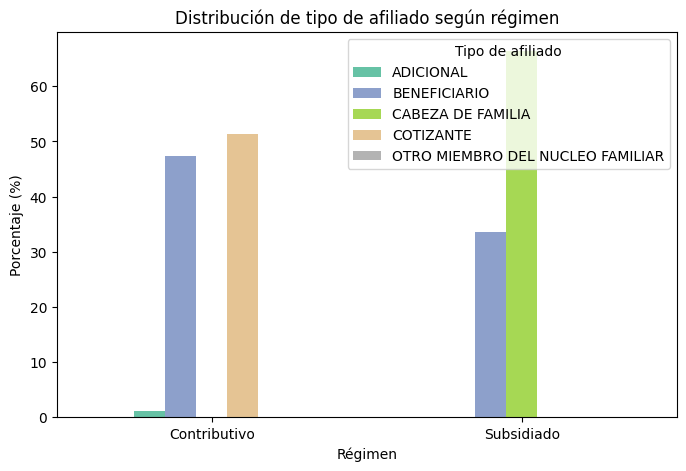

In [50]:
# -----------------------------
# 1. Tabla de contingencia Régimen vs Tipo de afiliado
# -----------------------------

tabla = pd.crosstab(df['Régimen'], df['Tipo de afiliado'])
print("Tabla de contingencia:\n", tabla)

df=df_union_sep
# -----------------------------
# 2. Porcentajes por fila
# -----------------------------
tabla_pct = pd.crosstab(df['Régimen'], df['Tipo de afiliado'], normalize='index') * 100
print("\nDistribución porcentual (%):\n", tabla_pct.round(2))

# -----------------------------
# 3. Prueba Chi-cuadrado de independencia
# -----------------------------
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"\nChi2 = {chi2:.3f}, gl = {dof}, p-valor = {p:.4f}")

if p < 0.05:
    print("👉 Existe asociación significativa entre Régimen y Tipo de afiliado.")
else:
    print("👉 No se observa asociación estadísticamente significativa.")

# A partir de la tabla de contingencia
n = tab.values.sum()
phi2 = chi2/n
r, k = tab.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
rcorr = r - ((r-1)**2)/(n-1)
kcorr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
print(f"Cramér's V = {cramers_v:.3f}")


if p < 0.05:
    print("👉 Existe asociación significativa.")
else:
    print("👉 No se observa asociación significativa.")


# -----------------------------
# 4. Gráfico de barras agrupadas
# -----------------------------
tabla_pct.plot(kind='bar', stacked=False, figsize=(8,5), colormap='Set2')
plt.title('Distribución de tipo de afiliado según régimen')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)
plt.show()



Género vs Condición del beneficiario

Tabla de contingencia:
 Condición del beneficiario  DISCAPACIDAD  ESTUDIANTE  NO APLICA
Género                                                         
Femenino                           12616        8743     847061
Masculino                          13756        7943     889789

Chi2=96.731 | gl=2 | p-valor=0.000000
Conclusión: Asociación significativa.

Distribución porcentual por género (%):
 Condición del beneficiario  DISCAPACIDAD  ESTUDIANTE  NO APLICA
Género                                                         
Femenino                            1.45        1.01      97.54
Masculino                           1.51        0.87      97.62
Cramér's V = 0.007
👉 Existe asociación significativa.


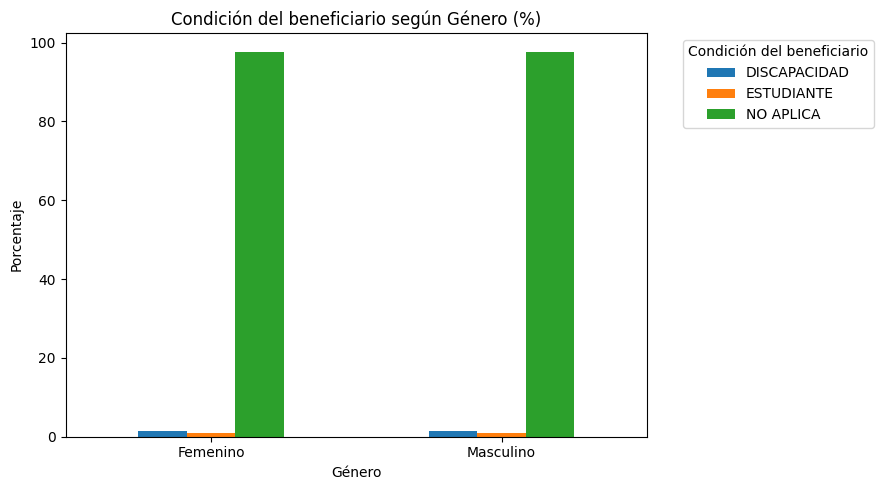

In [38]:
sub = df[['Género', 'Condición del beneficiario']].dropna()

tab = pd.crosstab(sub['Género'], sub['Condición del beneficiario'])
print("Tabla de contingencia:\n", tab)

chi2, p, dof, exp = chi2_contingency(tab)
print(f"\nChi2={chi2:.3f} | gl={dof} | p-valor={p:.6f}")
print("Conclusión:", "Asociación significativa." if p < 0.05 else "No significativa.")

tab_pct = pd.crosstab(sub['Género'], sub['Condición del beneficiario'], normalize='index')*100
print("\nDistribución porcentual por género (%):\n", tab_pct.round(2))

# A partir de la tabla de contingencia
n = tab.values.sum()
phi2 = chi2/n
r, k = tab.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
rcorr = r - ((r-1)**2)/(n-1)
kcorr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
print(f"Cramér's V = {cramers_v:.3f}")


if p < 0.05:
    print("👉 Existe asociación significativa.")
else:
    print("👉 No se observa asociación significativa.")

ax = tab_pct.plot(kind='bar', figsize=(9,5))
ax.set_title('Condición del beneficiario según Género (%)')
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Género')
plt.xticks(rotation=0)
plt.legend(title='Condición del beneficiario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Grupo etario vs Estado del afiliado

Tabla de contingencia:
 Estado del afiliado  Activo  Protección Laboral C
Grupo etario                                     
1 a 5                145163                  2688
15 a 19              158084                  3190
19 a 45              332246                 16588
45 a 50              150356                  4150
5 a 15               206591                  5267
50 a 55              139285                  3417
55 a 60              130590                  3113
60 a 65              117434                  2569
65 a 70               99934                  1641
70 a 75               82351                  1148
< 1                   79300                  1228
> 75                  92225                  1350

Chi2=8912.670 | gl=11 | p-valor=0.000000
Conclusión: Asociación significativa.

Distribución porcentual por grupo etario (%):
 Estado del afiliado  Activo  Protección Laboral C
Grupo etario                                     
1 a 5                 98.18                  1.8

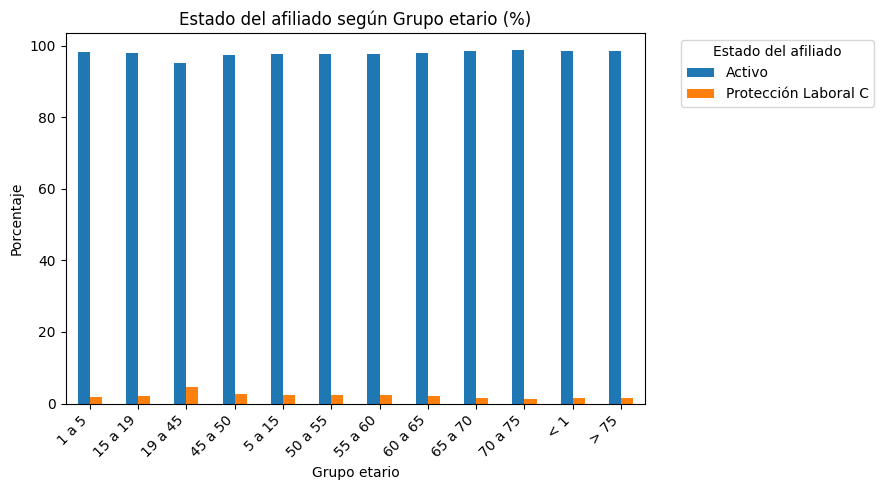

In [39]:
sub = df[['Grupo etario', 'Estado del afiliado']].dropna()

tab = pd.crosstab(sub['Grupo etario'], sub['Estado del afiliado'])
print("Tabla de contingencia:\n", tab)

chi2, p, dof, exp = chi2_contingency(tab)
print(f"\nChi2={chi2:.3f} | gl={dof} | p-valor={p:.6f}")
print("Conclusión:", "Asociación significativa." if p < 0.05 else "No significativa.")

tab_pct = pd.crosstab(sub['Grupo etario'], sub['Estado del afiliado'], normalize='index')*100
print("\nDistribución porcentual por grupo etario (%):\n", tab_pct.round(2))

# A partir de la tabla de contingencia
n = tab.values.sum()
phi2 = chi2/n
r, k = tab.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
rcorr = r - ((r-1)**2)/(n-1)
kcorr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
print(f"Cramér's V = {cramers_v:.3f}")


if p < 0.05:
    print("👉 Existe asociación significativa.")
else:
    print("👉 No se observa asociación significativa.")

ax = tab_pct.plot(kind='bar', figsize=(9,5))
ax.set_title('Estado del afiliado según Grupo etario (%)')
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Grupo etario')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado del afiliado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Zona de Afiliación vs Nivel del Sisbén

Tabla de contingencia:
 Nivel del Sisbén                0       1       2     3  4      A     B  \
Zona de Afiliación                                                        
Rural                       61535  178428   99294   603  0   7592  1191   
Rural - Dispersal           29362   48794   19759    21  0   2556   341   
Rural - Resto Rural          4305    2487     676     1  2     31     4   
Urbana                     128069  224471  148307  2658  2  10923  2879   
Urbana - Centro Poblado      5253    3820    1357     0  0    303    46   
Urbana-Cabecera Municipal   61056   75022   40305   112  0   4000  1044   

Nivel del Sisbén               C       N      O  
Zona de Afiliación                               
Rural                       7846  186379  16455  
Rural - Dispersal           2641   36777   4791  
Rural - Resto Rural           28    2522    127  
Urbana                     11546  253318  21659  
Urbana - Centro Poblado      331    2232    602  
Urbana-Cabecera Municipal

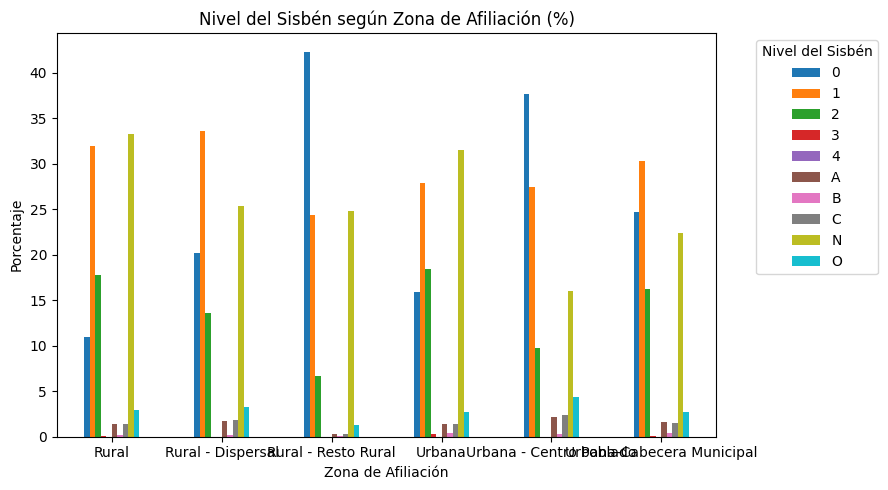

In [40]:
sub = df[['Departamento', 'Régimen']].dropna()

# Limitar a los 12 departamentos con más registros para visualización clara
topN = 12
top_deps = sub['Departamento'].value_counts().nlargest(topN).index
sub_top = sub[sub['Departamento'].isin(top_deps)]

tab = pd.crosstab(sub_top['Departamento'], sub_top['Régimen'])
print("Tabla de contingencia (Top 12 departamentos):\n", tab)

chi2, p, dof, exp = chi2_contingency(tab)
print(f"\nChi2={chi2:.3f} | gl={dof} | p-valor={p:.6f}")
print("Conclusión:", "Asociación significativa." if p < 0.05 else "No significativa.")

tab_pct = pd.crosstab(sub_top['Departamento'], sub_top['Régimen'], normalize='index')*100
print("\nDistribución porcentual por departamento (Top 12) (%):\n", tab_pct.round(2))

ax = tab_pct.plot(kind='bar', figsize=(11,6))
ax.set_title('Régimen por Departamento (Top 12) (%)')
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Departamento')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Régimen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Departamento vs Nivel de Sisben

Tabla de contingencia (Top 12 departamentos):
 Régimen       Contributivo  Subsidiado
Departamento                          
ANTIOQUIA            80836      117101
ATLANTICO            23306       41048
BOLIVAR              27519       49385
BOYACA               39850       61809
CAUCA                22115       43935
CORDOBA              26539       50220
CUNDINAMARCA         69079      100813
MAGDALENA            19058       41333
NARINO               20491       52599
SANTANDER            39985       62456
TOLIMA               25437       46171
VALLE                47271       74457

Chi2=6683.259 | gl=11 | p-valor=0.000000
Conclusión: Asociación significativa.

Distribución porcentual por departamento (Top 12) (%):
 Régimen       Contributivo  Subsidiado
Departamento                          
ANTIOQUIA            40.84       59.16
ATLANTICO            36.22       63.78
BOLIVAR              35.78       64.22
BOYACA               39.20       60.80
CAUCA                33.48       66.

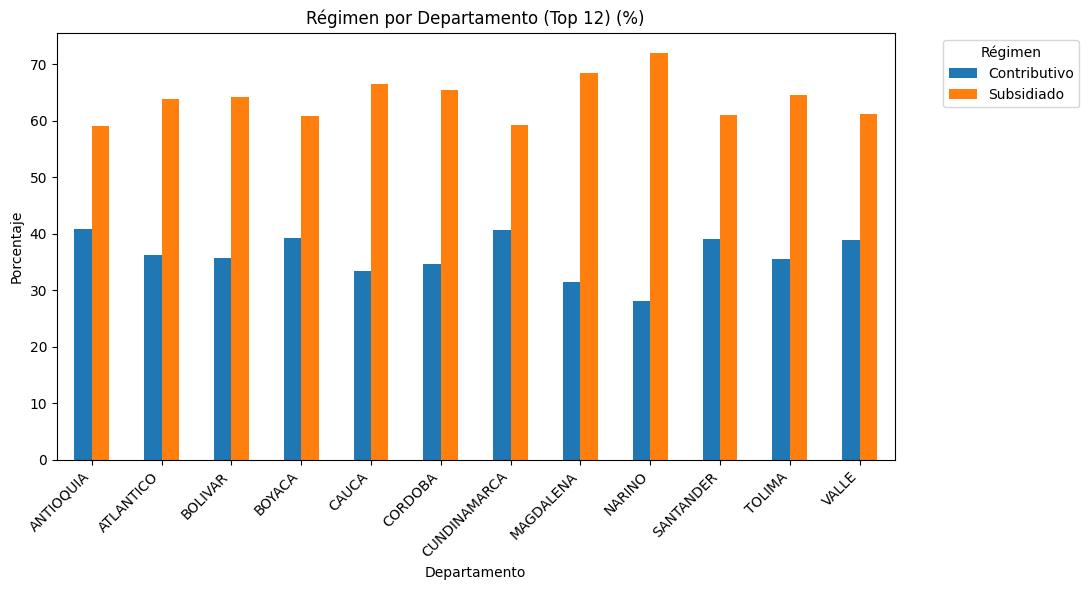

In [49]:
sub = df[['Departamento', 'Régimen']].dropna()

# Limitar a los 12 departamentos con más registros para visualización clara
topN = 12
top_deps = sub['Departamento'].value_counts().nlargest(topN).index
sub_top = sub[sub['Departamento'].isin(top_deps)]

tab = pd.crosstab(sub_top['Departamento'], sub_top['Régimen'])
print("Tabla de contingencia (Top 12 departamentos):\n", tab)

chi2, p, dof, exp = chi2_contingency(tab)
print(f"\nChi2={chi2:.3f} | gl={dof} | p-valor={p:.6f}")
print("Conclusión:", "Asociación significativa." if p < 0.05 else "No significativa.")

tab_pct = pd.crosstab(sub_top['Departamento'], sub_top['Régimen'], normalize='index')*100
print("\nDistribución porcentual por departamento (Top 12) (%):\n", tab_pct.round(2))

# A partir de la tabla de contingencia
n = tab.values.sum()
phi2 = chi2/n
r, k = tab.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
rcorr = r - ((r-1)**2)/(n-1)
kcorr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
print(f"Cramér's V = {cramers_v:.3f}")

ax = tab_pct.plot(kind='bar', figsize=(11,6))
ax.set_title('Régimen por Departamento (Top 12) (%)')
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Departamento')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Régimen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##Análisis Multivariado

<Axes: title={'center': 'Distribución de los regímenes'}, xlabel='Régimen'>

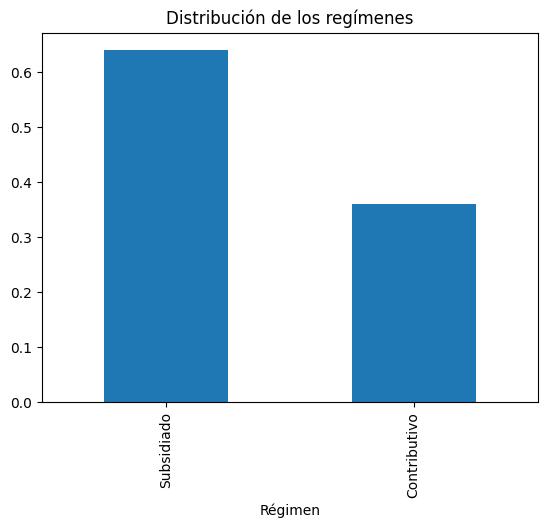

In [ ]:
df_union_copy['Régimen'].value_counts(normalize=True).plot(kind='bar', title='Distribución de los regímenes')

| Régimen          | Participación | Interpretación socioeconómica                                                         |
| ---------------- | ------------- | ------------------------------------------------------------------------------------- |
| **Subsidiado**   | ~64%          | Mayor presencia de población en condiciones de vulnerabilidad o informalidad laboral. |
| **Contributivo** | ~36%          | Menor proporción de trabajadores formales o con ingresos estables.                    |


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

df = df_union_copy.copy()

y = df['Régimen']
X = df.drop(columns=['Régimen'])

# (opcional) reducir cardinalidad: top-N por columna
def topN_or_other(s, N=50):
    top = s.value_counts().nlargest(N).index
    return s.where(s.isin(top), other='__OTRO__')

high_card_cols = [c for c in X.columns if X[c].nunique() > 60]   # ajusta el umbral
for c in high_card_cols:
    X[c] = topN_or_other(X[c], N=60)

# codificación esparcida y tipo chico
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True, dtype=np.int8)

# reducción tipo “PCA para sparse” (MCA aproximado)
svd = TruncatedSVD(n_components=2, random_state=42)

pipe = Pipeline([
    ('enc', ohe),
    ('svd', svd),   # entrega 2 componentes para graficar/analizar
])

X_svd = pipe.fit_transform(X)

#2) Visualización/diagnóstico con muestra estratificada

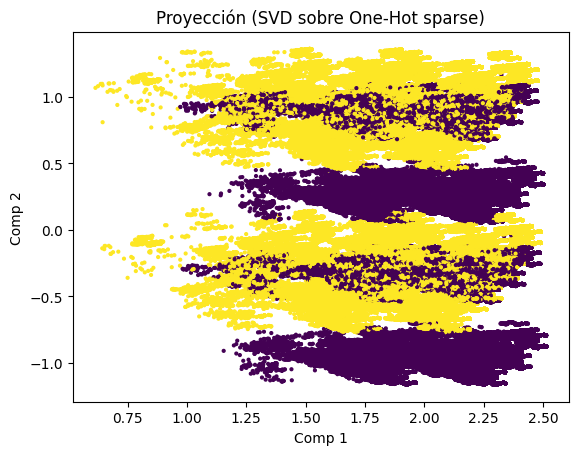

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=50000, random_state=42) # ajusta tamaño
idx_train, _ = next(sss.split(df, y))
df_sample = df.iloc[idx_train].reset_index(drop=True)

y_s = df_sample['Régimen']
X_s = df_sample.drop(columns=['Régimen'])

for c in [c for c in X_s.columns if X_s[c].nunique() > 60]:
    X_s[c] = topN_or_other(X_s[c], N=60)

X_svd = Pipeline([('enc', ohe), ('svd', svd)]).fit_transform(X_s)

# ejemplo de scatter
import matplotlib.pyplot as plt
import pandas as pd
h = pd.factorize(y_s)[0]
plt.scatter(X_svd[:,0], X_svd[:,1], c=h, s=4)
plt.title('Proyección (SVD sobre One-Hot sparse)'); plt.xlabel('Comp 1'); plt.ylabel('Comp 2')
plt.show()

| Observación            | Interpretación                                            |
| ---------------------- | --------------------------------------------------------- |
| Colores bien separados | Alta diferenciación entre regímenes                       |
| Bandas horizontales    | Estratos o grupos definidos por combinaciones categóricas |
| Zonas de mezcla        | Áreas donde ambos regímenes comparten características     |
| Poca dispersión        | Variables explican bien el comportamiento del régimen     |


#3) Fuerza de asociación  (χ² / Cramer’s V)

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    tab = pd.crosstab(x, y)
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.to_numpy().sum()
    r, k = tab.shape
    phi2 = chi2 / n
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

scores = {c: cramers_v(df[c], df['Régimen']) for c in df.columns if c!='Régimen'}
pd.Series(scores).sort_values(ascending=False)

,0
Código de la entidad,0.999983
Tipo de afiliado,0.766364
Nombre de la entidad,0.673055
Nivel del Sisbén,0.578552
Estado del afiliado,0.217868
Municipio,0.134788
Zona de Afiliación,0.125388
Condición del beneficiario,0.121343
Grupo etario,0.117238
Departamento,0.092710


| Variable                               | Valor (θ)                                                                                                                                                                                                                                           | Interpretación |
| -------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------- |
| **Código de la entidad (0.999983)**    | Asociación casi perfecta. El tipo de **EPS** (entidad prestadora) prácticamente determina el régimen. En la base, cada régimen parece estar ligado a un conjunto específico de códigos de entidad (por ejemplo, EPS subsidiadas vs. contributivas). |                |
| **Tipo de afiliado (0.766)**           | Asociación fuerte. El tipo de afiliado (Cotizante o Beneficiario) tiene una gran influencia: los **cotizantes** suelen pertenecer al **régimen contributivo**, y los **beneficiarios** o **subsidiados** al **régimen subsidiado**.                 |                |
| **Nombre de la entidad (0.673)**       | Asociación fuerte. Similar al código, indica que ciertas **EPS** operan en un régimen específico.                                                                                                                                                   |                |
| **Nivel del Sisbén (0.579)**           | Asociación fuerte. Los **niveles bajos del Sisbén (0, 1, 2)** se asocian con el **régimen subsidiado**, mientras que niveles altos o ausencia de Sisbén con el **contributivo**.                                                                    |                |
| **Estado del afiliado (0.218)**        | Asociación débil-moderada. El estado (activo/inactivo) tiene algún efecto, pero no determina el régimen.                                                                                                                                            |                |
| **Municipio (0.135)**                  | Asociación débil. Hay diferencias regionales, pero no son determinantes del régimen.                                                                                                                                                                |                |
| **Zona de Afiliación (0.126)**         | Asociación débil. Aunque el régimen subsidiado puede tener más afiliados rurales, la variable no explica por sí sola el régimen.                                                                                                                    |                |
| **Condición del beneficiario (0.121)** | Asociación débil. Puede reforzar lo que ya explica el tipo de afiliado.                                                                                                                                                                             |                |
| **Grupo etario (0.117)**               | Asociación débil. La edad influye ligeramente, pero no define el régimen.                                                                                                                                                                           |                |
| **Departamento (0.093)**               | Asociación débil. Existen diferencias geográficas marginales.                                                                                                                                                                                       |                |
| **Género (0.009)**                     | Sin asociación. El sexo no influye en el régimen de afiliación.                                                                                                                                                                                     |                |


#4) Modelo explicativo

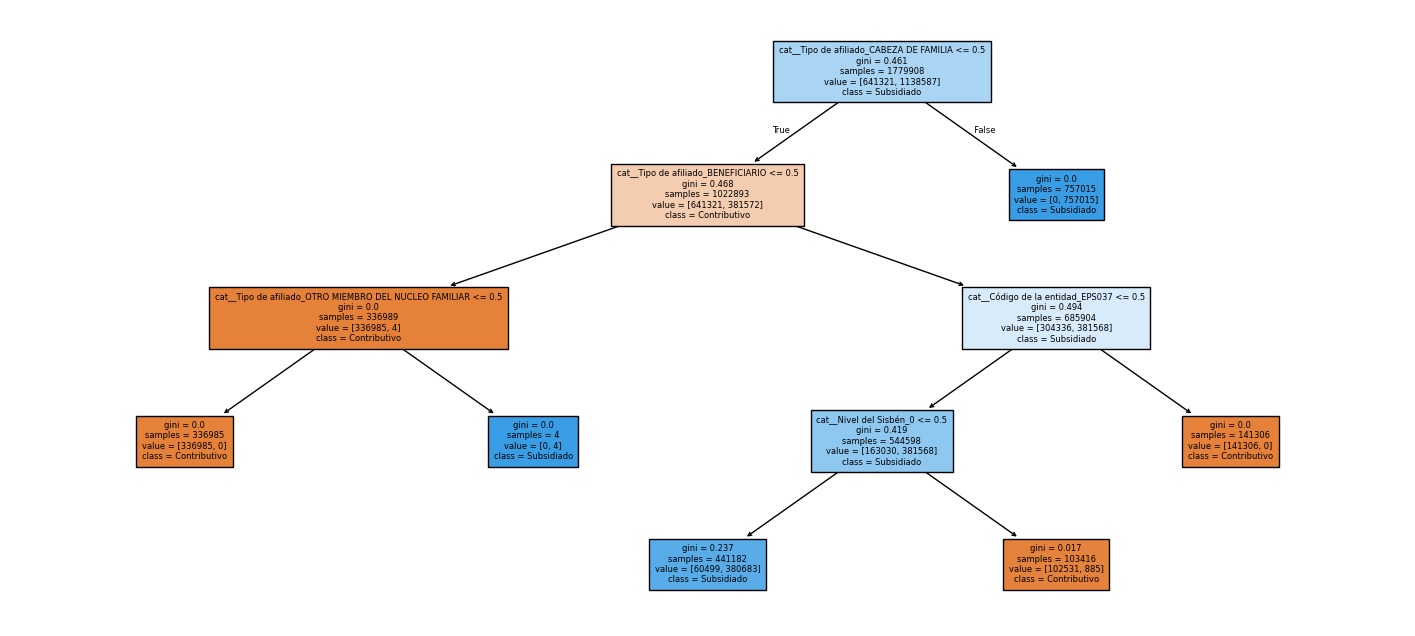

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df_union_copy.drop(columns=['Régimen'])
y = df_union_copy['Régimen']

categorical_features = X.columns.tolist()
encoder = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

tree = DecisionTreeClassifier(max_depth=4, random_state=42)

pipe = Pipeline(steps=[('encoder', encoder), ('tree', tree)])
pipe.fit(X, y)

plt.figure(figsize=(18,8))
plot_tree(tree, filled=True, feature_names=pipe['encoder'].get_feature_names_out(), class_names=pipe.classes_, fontsize=6)
plt.show()

| Nivel del árbol | Variable                              | Rol explicativo               | Régimen asociado                                                                |
| --------------- | ------------------------------------- | ----------------------------- | ------------------------------------------------------------------------------- |
| 1               | Tipo de afiliado                      | Eje principal del modelo      | Define el tipo de participación (cotizante / beneficiario / cabeza de familia). |
| 2               | Código de la entidad (EPS)            | Segmenta por institución      | EPS distintas operan en distintos regímenes.                                    |
| 3               | Nivel del Sisbén                      | Determina condición económica | Niveles bajos → subsidiado.                                                     |
| 4               | Condiciones específicas de afiliación | Ajustes menores               | Diferencian casos residuales.                                                   |
